IMPORTS

In [17]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
import MDAnalysis as mda
from scipy.stats import norm as norms

FILE LOCATIONS

In [4]:
path_he = '/Users/jake/Documents/CANES2019/Sim_Research/CANES_2019/files-tutorials/helix/runs_2-pulling/'
path_ha = '/Users/jake/Documents/CANES2019/Sim_Research/CANES_2019/files-tutorials/hairpin/runs_2_pulling/'
top1 = 'pull-v-0-1.tpr'
trj1 = 'pull-v-0-1.xtc'
top2 = 'pull-v-0-01.tpr'
trj2 = 'pull-v-0-01.xtc'
top3 = 'pull-v-0-001.tpr'
trj3 = 'pull-v-0-001.xtc'
top4 = 'pull-v-0-0001.tpr'
trj4 = 'pull-v-0-0001.xtc'
top5 = 'pull.tpr'
trj5 = 'pull.xtc'

LOAD UNIVERSE

In [5]:
u1 = mda.Universe(path_he+top1, path_he+trj1)
u2 = mda.Universe(path_he+top2, path_he+trj2)
u3 = mda.Universe(path_he+top3, path_he+trj3)
u4 = mda.Universe(path_he+top4, path_he+trj4)
u5 = mda.Universe(path_ha+top5, path_ha+trj5)

ATOM SELECTIONS

In [9]:
endCA1 = u1.select_atoms('(resid 0 or resid 12) and name CA') 
endCA2 = u2.select_atoms('(resid 0 or resid 12) and name CA') 
endCA3 = u3.select_atoms('(resid 0 or resid 12) and name CA') 
endCA4 = u4.select_atoms('(resid 0 or resid 12) and name CA') 
endCA5 = u5.select_atoms('(resid 0 or resid 11) and name CA')
putin1 = u1.select_atoms('protein')
putin2 = u2.select_atoms('protein')
putin3 = u3.select_atoms('protein')
putin4 = u4.select_atoms('protein')
putin5 = u5.select_atoms('protein')

OBTAIN E2E, RoG

In [10]:
e2e1, e2e2, e2e3, e2e4, e2e5 = [], [], [], [], []
rgyr1, rgyr2, rgyr3, rgyr4, rgyr5 = [], [], [], [], []

for ts in u1.trajectory:
    e2e1.append((u1.trajectory.time, norm(endCA1[0].position - endCA1[1].position)))
    rgyr1.append((u1.trajectory.time, putin1.radius_of_gyration()))
for ts in u2.trajectory:
    e2e2.append((u2.trajectory.time, norm(endCA2[0].position - endCA2[1].position)))
    rgyr2.append((u2.trajectory.time, putin2.radius_of_gyration()))
for ts in u3.trajectory:
    e2e3.append((u3.trajectory.time, norm(endCA3[0].position - endCA3[1].position)))
    rgyr3.append((u3.trajectory.time, putin3.radius_of_gyration()))
for ts in u4.trajectory:
    e2e4.append((u4.trajectory.time, norm(endCA4[0].position - endCA4[1].position)))
    rgyr4.append((u4.trajectory.time, putin4.radius_of_gyration()))
for ts in u5.trajectory:
    e2e5.append((u5.trajectory.time, norm(endCA5[0].position - endCA5[1].position)))
    rgyr5.append((u5.trajectory.time, putin5.radius_of_gyration()))

e2e1 = np.array(e2e1)
e2e2 = np.array(e2e2)
e2e3 = np.array(e2e3)
e2e4 = np.array(e2e4)
e2e5 = np.array(e2e5)
rgyr1 = np.array(rgyr1)
rgyr2 = np.array(rgyr2)
rgyr3 = np.array(rgyr3)
rgyr4 = np.array(rgyr4)
rgyr5 = np.array(rgyr5)

PLOT E2E HISTOGRAMS

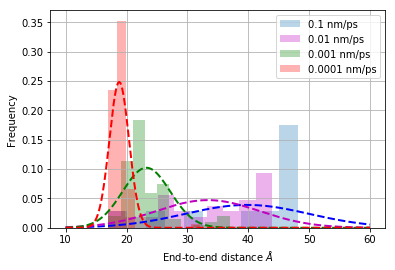

In [16]:
xran = np.linspace(10,60,1000)

mu, sigma = norms.fit(e2e1[:,1])
n, bins, patches = plt.hist(e2e1[:,1], density=1, bins = 10, label = '0.1 nm/ps', alpha = 0.3)
y = norms.pdf( xran, mu, sigma)
l = plt.plot(xran, y, 'b--', linewidth=2)

(mu, sigma) = norms.fit(e2e2[:,1])
n, bins, patches = plt.hist(e2e2[:,1], density=1, bins = 10, label = '0.01 nm/ps', color = 'm', alpha = 0.3)
y = norms.pdf( xran, mu, sigma)
l = plt.plot(xran, y, 'm--', linewidth=2)

(mu, sigma) = norms.fit(e2e3[:,1])
n, bins, patches = plt.hist(e2e3[:,1], density=1, bins = 10, label = '0.001 nm/ps', color = 'g', alpha = 0.3)
y = norms.pdf( xran, mu, sigma)
l = plt.plot(xran, y, 'g--', linewidth=2)

(mu, sigma) = norms.fit(e2e4[:,1])
n, bins, patches = plt.hist(e2e4[:,1], density=1, bins = 10, label = '0.0001 nm/ps', color = 'r', alpha = 0.3)
y = norms.pdf( xran, mu, sigma)
l = plt.plot(xran, y, 'r--', linewidth=2)

plt.xlabel('End-to-end distance $\AA$')
plt.ylabel('Frequency')
plt.grid()

plt.legend()

INDIVIDUALLY PLOT RoG + E2E

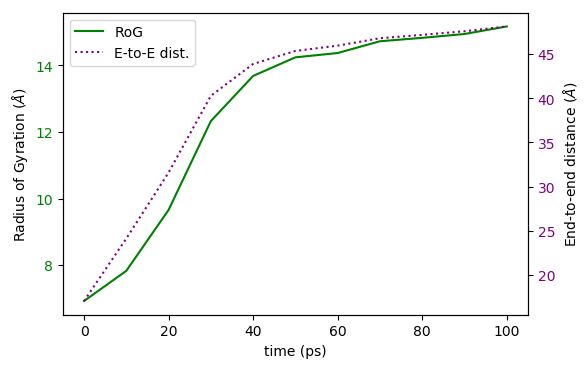

In [14]:
fig, ax1 = plt.subplots(dpi=100)
color = 'green'
ax1.set_xlabel('time (ps)')
ax1.set_ylabel('Radius of Gyration ($\AA$)')
ax1.plot(rgyr1[:,0], rgyr1[:,1], color = color, label = 'RoG')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'purple'
#ax2.set_xlabel('step')
ax2.set_ylabel('End-to-end distance ($\AA$)')
ax2.plot(e2e1[:,0], e2e1[:,1], ':', color = color, label = 'E-to-E dist.')
ax2.tick_params(labelcolor=color)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines1 + lines2, labels1 + labels2, loc=2)